#                                                                                                             ***MNIST IMAGE CLASSIFICATION***

*Adding all the needed imports*

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

*Model Definition*

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3) #input 28x28x3 OUtput 26x26x16 RF 3
        self.bn1 = nn.BatchNorm2d(16)

        self.conv2 = nn.Conv2d(16, 16, 3) #input 26x26x16 OUtput 24x24x16 RF 5
        self.bn2 = nn.BatchNorm2d(16)

        self.conv3 = nn.Conv2d(16, 16, 3) #input 24x24x16 OUtput 22x22x16 RF 7
        self.bn3 = nn.BatchNorm2d(16)
        
        self.pool1 = nn.MaxPool2d(2, 2)  #input 22x22x16 OUtput 11x11x16 RF 8

        self.conv4 = nn.Conv2d(16, 8, 1) #input 11x11x16 OUtput 11x11x8 RF 8
        self.bn4 = nn.BatchNorm2d(8)
        
        self.conv5 = nn.Conv2d(8, 16, 3) #input 11x11x8 OUtput 9x9x16 RF 12
        self.bn5 = nn.BatchNorm2d(16)
        self.dp5 = nn.Dropout2d(0.2)

        self.conv6 = nn.Conv2d(16, 16, 3) #input 9x9x16 OUtput 7x7x16 RF 16
        self.bn6 = nn.BatchNorm2d(16)
        self.dp6 = nn.Dropout2d(0.2)

        self.conv7 = nn.Conv2d(16, 16, 3) #input 7x7x16 OUtput 5x5x16 RF 20
        self.bn7 = nn.BatchNorm2d(16)
        self.dp7 = nn.Dropout2d(0.2)

        self.conv8 = nn.Conv2d(16, 10, 5) #input 5x5x16 OUtput 1x1x10 RF 2
        

    def forward(self, x):
        x = (self.bn1(F.relu(self.conv1(x)))) 
        x = (self.bn2(F.relu(self.conv2(x)))) 
        x = self.pool1((self.bn3(F.relu(self.conv3(x))))) 
        x = self.bn4(F.relu(self.conv4(x))) 
        x = self.dp5(self.bn5(F.relu(self.conv5(x)))) 
        x = self.dp6(self.bn6(F.relu(self.conv6(x)))) 
        x = self.dp7(self.bn7(F.relu(self.conv7(x)))) 
        x = self.conv8(x) 
        x = x.view(-1, 10)
        return F.log_softmax(x)

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
       BatchNorm2d-2           [-1, 16, 26, 26]              32
            Conv2d-3           [-1, 16, 24, 24]           2,320
       BatchNorm2d-4           [-1, 16, 24, 24]              32
            Conv2d-5           [-1, 16, 22, 22]           2,320
       BatchNorm2d-6           [-1, 16, 22, 22]              32
         MaxPool2d-7           [-1, 16, 11, 11]               0
            Conv2d-8            [-1, 8, 11, 11]             136
       BatchNorm2d-9            [-1, 8, 11, 11]              16
           Conv2d-10             [-1, 16, 9, 9]           1,168
      BatchNorm2d-11             [-1, 16, 9, 9]              32
        Dropout2d-12             [-1, 16, 9, 9]               0
           Conv2d-13             [-1, 16, 7, 7]           2,320
      BatchNorm2d-14             [-1, 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Loading MNIST data using dataloader

In [0]:


torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)



Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


*Plotting few data images*

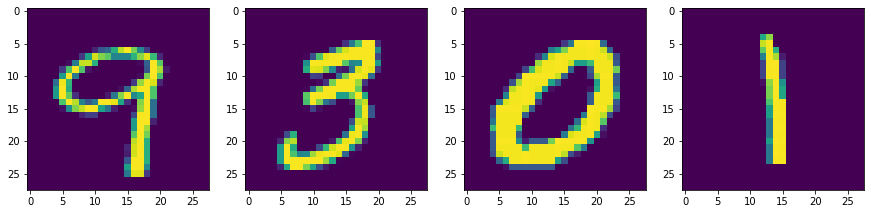

In [0]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig=plt.figure(figsize=(1, 4))
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 4, 1)
plt.imshow(np.transpose(images[0].cpu().detach().numpy().reshape(28,28), (0,1)))
fig.add_subplot(1, 4, 2)
plt.imshow(np.transpose(images[1].cpu().detach().numpy().reshape(28,28), (0,1)))
fig.add_subplot(1, 4, 3)
plt.imshow(np.transpose(images[2].cpu().detach().numpy().reshape(28,28), (0,1)))
fig.add_subplot(1, 4, 4)
plt.imshow(np.transpose(images[3].cpu().detach().numpy().reshape(28,28), (0,1)))

*Training and testing loop definition*

*Loss: NLL_loss*

*Batch size : 128*

In [0]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    torch.set_printoptions(precision=100)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss

*Using Stochiastic Gradient descent optimizer*

*Achieved 99.41% in 19 iteration*

*Modified learning rate using lr_scheduler, with gamma=0.5 and step and 10th,13th and 16th epoch*

In [0]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.5)
for epoch in range(1, 20):
    train(model, device, train_loader, optimizer, epoch)
    val_loss = test(model, device, test_loader)
    if(epoch==10 or epoch==13 or epoch==16):
      scheduler.step()
    for param_group in optimizer.param_groups:
      print(param_group['lr'],epoch+1)

  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0611, Accuracy: 9810/10000 (98.10%)

0.1 2


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0412, Accuracy: 9868/10000 (98.68%)

0.1 3


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0399, Accuracy: 9868/10000 (98.68%)

0.1 4


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0343, Accuracy: 9895/10000 (98.95%)

0.1 5


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 9893/10000 (98.93%)

0.1 6


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0330, Accuracy: 9897/10000 (98.97%)

0.1 7


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9916/10000 (99.16%)

0.1 8


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9894/10000 (98.94%)

0.1 9


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0366, Accuracy: 9898/10000 (98.98%)

0.1 10


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0253, Accuracy: 9924/10000 (99.24%)

0.05 11


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0240, Accuracy: 9923/10000 (99.23%)

0.05 12


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0224, Accuracy: 9928/10000 (99.28%)

0.05 13


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9933/10000 (99.33%)

0.025 14


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0226, Accuracy: 9934/10000 (99.34%)

0.025 15


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9929/10000 (99.29%)

0.025 16


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9933/10000 (99.33%)

0.0125 17


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9939/10000 (99.39%)

0.0125 18


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9936/10000 (99.36%)

0.0125 19


loss=0.04813094809651375 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 26.93it/s]



Test set: Average loss: 0.0210, Accuracy: 9941/10000 (99.41%)

0.0125 20
